# Sommaire :


### <a href="#C1"> **Partie 1 : Contexte et Objectifs**</a>

 - Contexte
 - Objectifs

<b><hr></b>

### <a href="#C2"> **Partie 2 : Mise en place de l'espace de travail**</a>
 - <a href="#C21"> Import des packages</a>
 - <a href="#C22"> Repertoire de travail</a>
 - <a href="#C23"> Changement du répertoire courant</a>
 - <a href="#C24"> Import des datas frames</a>

<b><hr></b>

### <a href="#C3"> **Partie 3 : Import DataFrames**</a>
 - <a href="#C31"> 3.1 Display</a>
 - <a href="#C32"> 3.2 Structure du dataframes</a>

<b><hr></b>
 
### <a href="#C4"> **Partie 4 : Extraction Features**</a>
 - <a href="#C41"> 4.1 Bags of Words</a>
     - <a href="#C411"> 4.1.1 CountVector</a>
     - <a href="#C412"> 4.1.2 TF-Idf</a>
</br></br>
 - <a href="#C42"> 4.2 Words/Sentence Embedding Classique</a>
      - <a href="#C421"> 4.2.1 Word2Vec</a>
      - <a href="#C422"> 4.2.2 Glove</a>
      - <a href="#C423"> 4.2.3 FastText</a>
      - <a href="#C424"> 4.2.4 Autres modélisations de sujets</a>
</br></br>
 - <a href="#C43"> 4.3 Words/Sentence Embedding</a>
      - <a href="#C431"> 4.2.3 BERT</a>
      - <a href="#C432"> 4.2.4 Universel Sentence Embedding</a>
</br>

 
<b><hr></b>

### <a href="#C5"> **Partie 5 : Conclusion**</a>


# <a name="C1">**Partie 1 : Contexte et Objectifs**</a> 

Contexte

Objectifs

In [2]:
from platform import python_version

print(python_version())

3.9.16


# <a name="C2"><font color='blue'>**Partie 2 : Mise en place de l'espace de travail**</font></a> 

### <a name="C21"><font color='blue'>2.1 Imports packages</font></a> 

###### <b><font color='blue'>2.1.0 Requirements</font></b>
- <b>Built-in</b>       : os, warnings
- <b>Data</b>           : pandas, numpy
- <b>Visualisations</b> : matplotlib, seaborn
- <b>Preprocessing</b>  : sklearn, scipy

###### <b><font color='blue'>2.1.1 Imports</font></b>

In [3]:
# Built-in
import os, warnings 

# Data
import numpy as np
import pandas as pd

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image
#%matplotlib inline

# NLP
import nltk #/!\ attention use nltk.download('punkt')
from nltk.stem.snowball import EnglishStemmer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, wordpunct_tokenize, RegexpTokenizer
from nltk.corpus import words, stopwords

import spacy
import re

#cluster
from sklearn.cluster import KMeans,MiniBatchKMeans, DBSCAN

#metrics
from sklearn.metrics import (silhouette_samples,silhouette_score, adjusted_rand_score,
                             adjusted_mutual_info_score,confusion_matrix, pair_confusion_matrix,
                            ConfusionMatrixDisplay)

###### <b><font color='blue'>2.1.2 Downloads and Options</font></b>

In [4]:
# La cpu_count méthode est utilisée pour renvoyer le nombre actuel de CPU logiques dans le système.
import psutil
print("The number of physical cores in the system is %s" % (psutil.cpu_count(logical=False),))
print("The number of logical cores in the system is %s" % (psutil.cpu_count(logical=True),))

The number of physical cores in the system is 4
The number of logical cores in the system is 8


In [5]:
# init sns
sns.set()

### <a name="C22"><font color='blue'>2.2 Working directory</font></a> 

In [6]:
os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'cc.en.100.bin',
 'cc.en.300.bin',
 'cc.en.300.bin.gz',
 'Classifiez automatiquement des biens de consommation_Images_CNN_Transfer_Learning_Stage_2_supervised_classification_V1.0 (1).ipynb',
 'Classifiez automatiquement des biens de consommation_Images_CNN_Transfer_Learning_Stage_2_supervised_classification_V1.0 (2).ipynb',
 'data',
 'EDA.ipynb',
 'Feature_extraction_faisaibilité.ipynb',
 'OC-DS-P6-Classifiez-automatiquement-des-biens-de-consommation.ipynb',
 'pretraitement_feature_extraction_faisaibilité.ipynb',
 'README.md',
 'Word Embedding.ipynb',
 "~$Étude de la faisabilité d'un moteur de classification.pptx",
 "Étude de la faisabilité d'un moteur de classification.pptx"]

# <a name="C3"><font color='teal'>**Partie 3 : Import DataFrames**</font></a> 

In [7]:
import pickle 
with open('data/cleaned/description_cleaned.pkl', 'rb') as f1:
    df = pickle.load(f1)

In [8]:
print("Dimension du dataframe importé {0} lignes {1} colonnes:".format(df.shape[0],df.shape[1]) )

Dimension du dataframe importé 1050 lignes 5 colonnes:


### <a name="C31"><font color='teal'>3.1 Display</font></a>

In [9]:
df.head(2)

,uniq_id,image,description,description_clean,cat_1
0,55b85ea15a1536d46b7190ad6fff8ce7,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,"[key, elegance, polyester, multicolor, abstrac...",home furnishing
1,7b72c92c2f6c40268628ec5f14c6d590,7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...,"[cotton, bath, towel, bath, towel, red, yellow...",baby care


In [10]:
df.sample(2)

,uniq_id,image,description,description_clean,cat_1
976,fa2e5f01bbb642c49e4b2e19d2b39dcf,fa2e5f01bbb642c49e4b2e19d2b39dcf.jpg,LOTTIE LONDON MAKE ME BLUSH (Pack of 1) Price:...,"[make, blush, pack, add, perfectly, colour, pr...",beauty and personal care
471,10ad262ebfdc8614e847d36e6fe9ecf9,10ad262ebfdc8614e847d36e6fe9ecf9.jpg,Specifications of giftsthatwow GTW-G-04 (300 m...,"[white, pack, general, brand, model, number, t...",kitchen & dining


### <a name="C32"><font color='teal'>3.2 Structure du dataframe</font></a> 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   uniq_id            1050 non-null   object
 1   image              1050 non-null   object
 2   description        1050 non-null   object
 3   description_clean  1050 non-null   object
 4   cat_1              1050 non-null   object
dtypes: object(5)
memory usage: 41.1+ KB


In [12]:
# Analyse de la classe des entité des pd.Series
df.apply(lambda x:type(x[0]))

uniq_id               <class 'str'>
image                 <class 'str'>
description           <class 'str'>
description_clean    <class 'list'>
cat_1                 <class 'str'>
dtype: object

In [13]:
%whos

Variable                     Type                Data/Info
----------------------------------------------------------
ConfusionMatrixDisplay       type                <class 'sklearn.metrics._<...>.ConfusionMatrixDisplay'>
DBSCAN                       type                <class 'sklearn.cluster._dbscan.DBSCAN'>
EnglishStemmer               ABCMeta             <class 'nltk.stem.snowball.EnglishStemmer'>
Image                        module              <module 'PIL.Image' from <...>packages\\PIL\\Image.py'>
KMeans                       ABCMeta             <class 'sklearn.cluster._kmeans.KMeans'>
MiniBatchKMeans              ABCMeta             <class 'sklearn.cluster._kmeans.MiniBatchKMeans'>
PorterStemmer                ABCMeta             <class 'nltk.stem.porter.PorterStemmer'>
RegexpTokenizer              ABCMeta             <class 'nltk.tokenize.regexp.RegexpTokenizer'>
WordCloud                    type                <class 'wordcloud.wordcloud.WordCloud'>
WordNetLemmatizer        

</br>

</br>

In [14]:
df.description[843]

'Buy Epresent Mfan 1 Fan USB USB Fan for Rs.219 online. Epresent Mfan 1 Fan USB USB Fan at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee.'

# <a name="C4"><font color='green'>**Partie 4 : Extraction Features**</font></a> 

## Fonction utils

In [108]:
def vectorize(list_of_docs, model):
    """Generate vectors for list of documents using a Word Embedding

    Args:
        list_of_docs: List of documents
        model: Gensim's Word Embedding

    Returns:
        List of document vectors
    """
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model:
                try:
                    vectors.append(model[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features

In [16]:
def mbkmeans_clusters(
    X, 
    k, 
    # mb, 
    print_silhouette_values, 
):
    """Generate clusters and print Silhouette metrics using MBKmeans

    Args:
        X: Matrix of features.
        k: Number of clusters.
        mb: Size of mini-batches.
        print_silhouette_values: Print silhouette values per cluster.

    Returns:
        Trained clustering model and labels based on X.
    """
    km = KMeans(n_clusters=k, init = 'k-means++',n_init=10).fit(X)
    print(f"For n_clusters = {k}")
    print(f"Silhouette coefficient: {silhouette_score(X, km.labels_):0.2f}")
    print(f"Inertia:{km.inertia_}")

    if print_silhouette_values:
        sample_silhouette_values = silhouette_samples(X, km.labels_)
        print(f"Silhouette values:")
        silhouette_values = []
        for i in range(k):
            cluster_silhouette_values = sample_silhouette_values[km.labels_ == i]
            silhouette_values.append(
                (
                    i,
                    cluster_silhouette_values.shape[0],
                    cluster_silhouette_values.mean(),
                    cluster_silhouette_values.min(),
                    cluster_silhouette_values.max(),
                )
            )
        silhouette_values = sorted(
            silhouette_values, key=lambda tup: tup[2], reverse=True
        )
        for s in silhouette_values:
            print(
                f"    Cluster {s[0]}: Size:{s[1]} | Avg:{s[2]:.2f} | Min:{s[3]:.2f} | Max: {s[4]:.2f}"
            )
    return km, km.labels_

In [17]:
def ARI_fct_raw(x_label_clust,x_label_true):
    ARI = np.round(adjusted_rand_score(x_label_clust, x_label_true),4)
    print("ARI : ", ARI)
    return(ARI)

In [18]:
import time
from sklearn import cluster, metrics
from sklearn import manifold, decomposition

# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features) :
    time1 = time.time()
    num_labels=len(l_cat)
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.title('Représentation des produits par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des produits par clusters')
    
    plt.show()
    print("ARI : ", ARI)


In [90]:
def plot_confusion_matrix( y_true, y_pred, class_labels=l_cat, display_labels=None, sample_weight=None,
                            normalize_f='true',        # --> option {'all', 'count', 'percent', None}
                            cmap='Blues',
                            ax=None,
                            title=None,
                            show_values='all',      # --> option {'all', 'true', 'pred'}
                            show_colorbar=True,     # --> option {True, False}
                            show_subtotals=True):   # --> option {True, False}
    
    fig = plt.figure(figsize=(15,6))
    ax1 = fig.add_subplot(111)
    
    disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                                                   xticks_rotation='vertical',
                                                   normalize=normalize_f, 
                                                   display_labels=class_labels,cmap=plt.cm.Blues,
                                                  ax=ax1)
    disp.ax_.set_title('Confusion matrix, without normalization')
    disp.ax_.set_xticklabels(range(7),rotation=0)

### Parametres utiles

In [45]:
l_cat = list(set(df['cat_1']))
print("catégories : ", l_cat)
y_cat_num = [(l_cat.index(df.iloc[i]['cat_1'])) for i in range(len(df))]

catégories :  ['home furnishing', 'watches', 'baby care', 'computers', 'kitchen & dining', 'home decor & festive needs', 'beauty and personal care']


In [46]:
set(y_cat_num)

{0, 1, 2, 3, 4, 5, 6}

### <a name="C41"><font color='green'>4.1 Bag Of Words </font></a> 

### - <a name="C411"><font color='green'>4.1.a Comptage de mots 1-gram </font></a> 

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

#class LemmaTokenizer(object):
#    def __init__(self):
#        self.wnl = WordNetLemmatizer()
#    def __call__(self, articles):
#        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

def LemmaTokenizer(articles):
    wnl = WordNetLemmatizer()
    return [wnl.lemmatize(t.lower()) for t in word_tokenize(articles)]

nlp = spacy.load('en_core_web_sm')

vectorizer = CountVectorizer(input='content', # the input is expected to be a sequence of items that can be of type string or byte
                             encoding='utf-8', 
                             decode_error='replace', #Instruction sur ce qu'il faut faire si une séquence d'octets est donnée à analyser qui contenant 
                             #des caractères n'appartenant pas à la donnée "encoding"
                             strip_accents='unicode', # Remove accents and perform other character normalization during the preprocessing step.
                             lowercase=True, # Convert all characters to lowercase before tokenizing
                             preprocessor=None, 
                             tokenizer=None, 
                             #stop_words='english',            
                             token_pattern = r"\b[a-zA-Z]{3,}\b", #ascii only alpha
                             #token_pattern = r"(?u)\b[a-zA-Z]+\b", #ascii only alpha
                             ngram_range=(1, 1), 
                             analyzer='word', 
                             max_df=351, 
                             min_df=3, #0.0013, # < 1.5/1050
                             max_features=None,
                             vocabulary=None, 
                             binary=False )

vecX = vectorizer.fit_transform( df.description.apply(lambda x: " ".join([token.lemma_ for token in nlp(x.lower())]) ) )

CountWord = pd.DataFrame( vecX.toarray(), columns=vectorizer.get_feature_names_out() )

print("Notre dataset est composé de {} lignes et {} colonnes".format(CountWord.shape[0],CountWord.shape[1]) )
CountWord.head()

Notre dataset est composé de 1050 lignes et 1415 colonnes


,aapno,able,about,above,absorbent,abstract,accessory,accord,across,act,...,yardley,year,yellow,yes,yet,you,your,yourself,youthful,zyxel
0,0,0,0,0,0,4,0,0,0,0,...,0,0,0,0,0,5,2,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,2,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,3,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0


In [22]:
# utiliser un minibatch kmeans pas utils si donnée compte moins de 2000 echantillons
clusteringCountVec, CountVeccluster_labels = mbkmeans_clusters(
    X=CountWord,
    k=7,
    # mb=1024, # puissance de 2
    print_silhouette_values=True,
)
print('\n')
print('Score ARI sur Avant diminution de dimension')
_ = ARI_fct_raw(CountVeccluster_labels,df.cat_1)

For n_clusters = 7
Silhouette coefficient: 0.31
Inertia:94738.90846267814
Silhouette values:
    Cluster 3: Size:7 | Avg:0.76 | Min:0.09 | Max: 0.87
    Cluster 6: Size:16 | Avg:0.48 | Min:0.08 | Max: 0.67
    Cluster 4: Size:5 | Avg:0.42 | Min:0.08 | Max: 0.55
    Cluster 2: Size:809 | Avg:0.42 | Min:0.09 | Max: 0.55
    Cluster 1: Size:13 | Avg:0.26 | Min:-0.02 | Max: 0.38
    Cluster 5: Size:81 | Avg:-0.08 | Min:-0.27 | Max: 0.07
    Cluster 0: Size:119 | Avg:-0.17 | Min:-0.39 | Max: -0.01


Score ARI sur Avant diminution de dimension
ARI :  0.0337


In [23]:
print("Most representative terms per cluster (based on centroids):")
for i in range(7):
    tokens_per_cluster = ""
    most_representative = CountWord.columns[np.argsort( clusteringCountVec.cluster_centers_[i] )[:5]]
    for t in most_representative:
        tokens_per_cluster += f"{t} "
    print(f"Cluster {i}: {tokens_per_cluster}")

Most representative terms per cluster (based on centroids):
Cluster 0: bedsheet smartpro vaio vgn sony 
Cluster 1: cotton mug coffee ceramic woman 
Cluster 2: shirt before freedom sipping laugh 
Cluster 3: material woman ideal yes style 
Cluster 4: material mug pack color ceramic 
Cluster 5: analog adapter showpiece tea dial 
Cluster 6: cotton warranty inch cover analog 


In [24]:
print( 'Score ARI après TSNE 2D + Clustering')
ARI, X_tsne, labels = ARI_fct(CountWord)

Score ARI après TSNE 2D + Clustering
ARI :  0.4139 time :  13.0


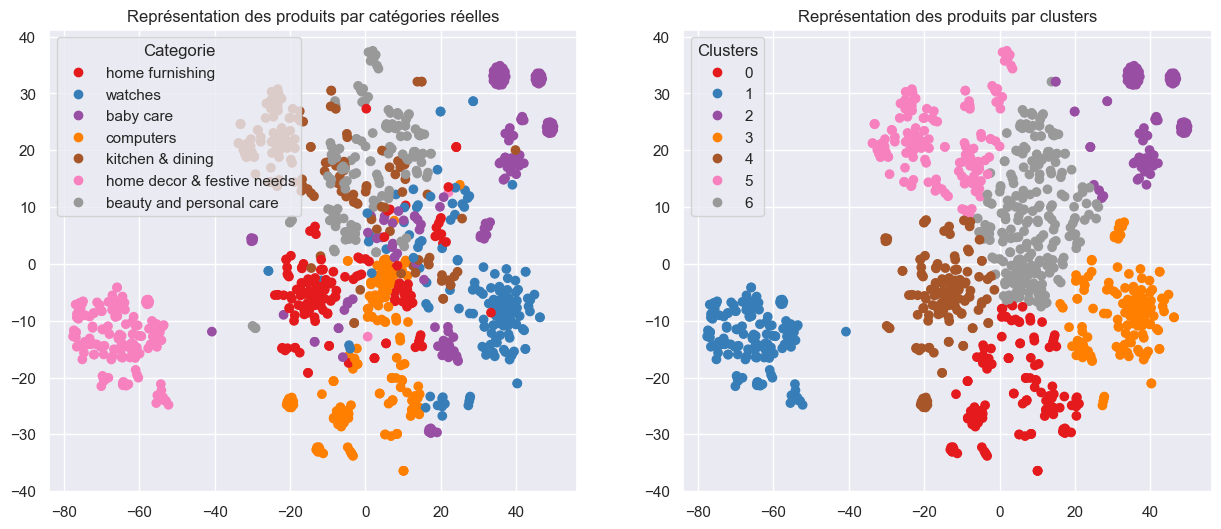

ARI :  0.4139


In [25]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

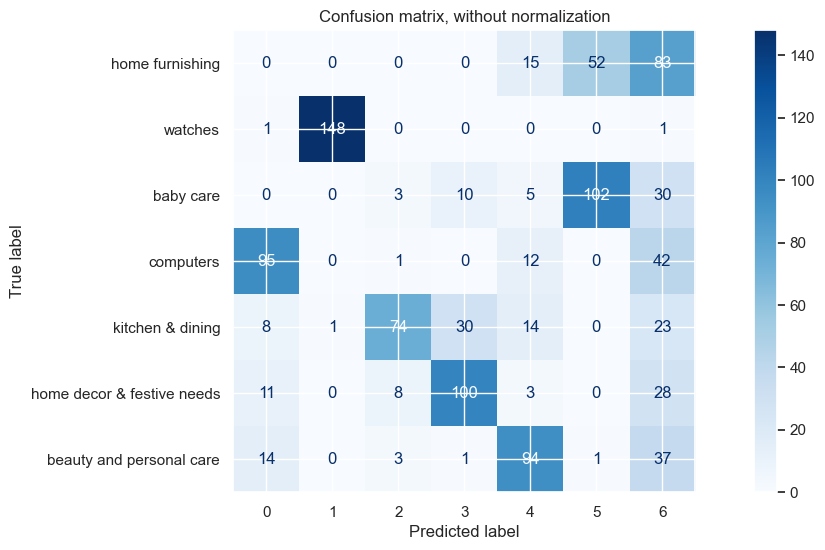

In [91]:
plot_confusion_matrix(y_cat_num, labels,class_labels=l_cat,normalize_f=None)

</Br>

### - <a name="C412"><font color='green'>4.1.b TF IDF </font></a> 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(
    input='content', # the input is expected to be a sequence of items that can be of type string or byte
    encoding='utf-8', 
    decode_error='replace', 
    strip_accents='ascii', # Remove accents and perform other character normalization during the preprocessing step.
    lowercase=True, # Convert all characters to lowercase before tokenizing
    preprocessor=None, 
    stop_words="english", 
    token_pattern = r"\b[a-zA-Z]{3,}\b", #ascii only alpha
    #tokenizer = RegexpTokenizer(r"[a-zA-Z]{3,}").tokenize,
    tokenizer=None,
    ngram_range=(1, 1), 
    analyzer='word', 
    max_df=351, 
    min_df=3, # < 1.5/1050
    max_features=None,
    vocabulary=None, binary=False ,
    smooth_idf = True
    )
tfidf_values = tfidf.fit_transform( df.description.apply(lambda x: " ".join([token.lemma_ for token in nlp(x.lower())]) ) )

TFIDF_df = pd.DataFrame(tfidf_values.toarray(),columns=tfidf.get_feature_names_out())

TFIDF_df.head()

In [ ]:
# utiliser un minibatch kmeans pas utils si donnée compte moins de 2000 echantillons
clusteringTFIDF, TFIDFcluster_labels = mbkmeans_clusters(
    X=TFIDF_df,
    k=7,
    # mb=1024, # puissance de 2
    print_silhouette_values=True,
)
print('\n')
print('Score ARI sur Avant diminution de dimension')
_ = ARI_fct_raw(TFIDFcluster_labels,df.cat_1)

In [ ]:
print("Most representative terms per cluster (based on centroids):")
for i in range(7):
    tokens_per_cluster = ""
    most_representative = CountWord.columns[np.argsort( clusteringTFIDF.cluster_centers_[i] )[:5]]
    for t in most_representative:
        tokens_per_cluster += f"{t} "
    print(f"Cluster {i}: {tokens_per_cluster}")

In [ ]:
print( 'Score ARI après TSNE 2D + Clustering')
ARI, X_tsne, labels = ARI_fct(TFIDF_df)

In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

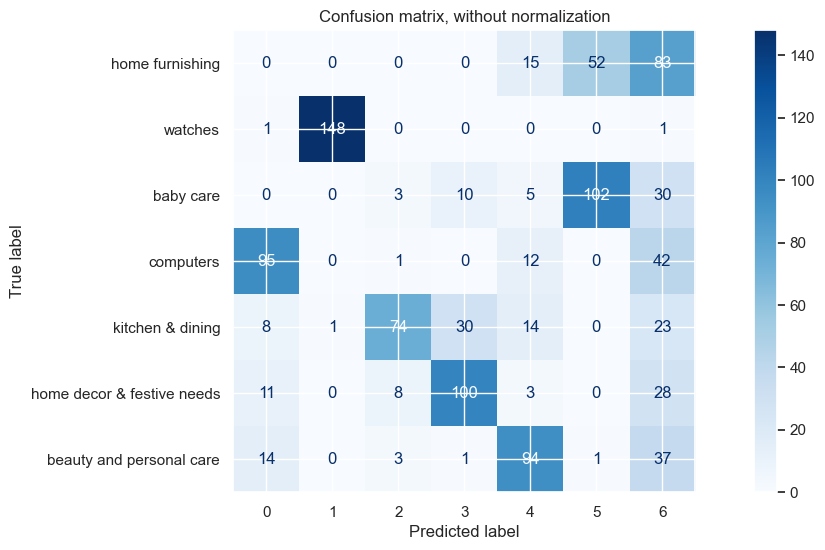

In [91]:
plot_confusion_matrix(y_cat_num, labels,class_labels=l_cat,normalize_f=None)

</Br>

### <a name="C42"><font color='green'>4.2 Word/Sentence embedding </font></a> 

### - <a name="C421"><font color='green'>4.2.a Word2Vec </font></a> 

### <font color='green'> Model entrainé localement </font>

In [96]:
help(Word2Vec)

Help on class Word2Vec in module gensim.models.word2vec:

class Word2Vec(gensim.utils.SaveLoad)
 |  Word2Vec(sentences=None, corpus_file=None, vector_size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, hashfxn=<built-in function hash>, epochs=5, null_word=0, trim_rule=None, sorted_vocab=1, batch_words=10000, compute_loss=False, callbacks=(), comment=None, max_final_vocab=None, shrink_windows=True)
 |  
 |  Method resolution order:
 |      Word2Vec
 |      gensim.utils.SaveLoad
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, sentences=None, corpus_file=None, vector_size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, hashfxn=<built-in function hash>, epochs=5, null_word=0, trim_rule=None, sorted_vocab=1, batch_words=100

In [95]:
from gensim.models import Word2Vec

print("Entrainement du model Word2Vec...")
model_W2V = Word2Vec(sentences=df.description_clean, vector_size =100, window=5, min_count=1, workers=4)
model_W2V.train(df.description_clean, total_examples=len(df.description_clean), epochs=50)

Entrainement du model Word2Vec...


(1467595, 1704600)

In [99]:
vectorized_docs = vectorize(df.description_clean, model=model_W2V.wv)

# utiliser un minibatch kmeans pas utils si donnée compte moins de 2000 echantillons
clusteringW2V, W2Vcluster_labels = mbkmeans_clusters(
    X=vectorized_docs,
    k=7,
    # mb=1024, # puissance de 2
    print_silhouette_values=True,
)
print('\n')
print('Score ARI sur Avant diminution de dimension')
_ = ARI_fct_raw(W2Vcluster_labels,df.cat_1)

For n_clusters = 7
Silhouette coefficient: 0.21
Inertia:15015.12230445295
Silhouette values:
    Cluster 1: Size:136 | Avg:0.48 | Min:0.15 | Max: 0.59
    Cluster 4: Size:75 | Avg:0.35 | Min:0.18 | Max: 0.45
    Cluster 3: Size:86 | Avg:0.29 | Min:0.05 | Max: 0.50
    Cluster 0: Size:76 | Avg:0.23 | Min:0.02 | Max: 0.38
    Cluster 2: Size:255 | Avg:0.13 | Min:-0.08 | Max: 0.32
    Cluster 5: Size:308 | Avg:0.13 | Min:-0.10 | Max: 0.30
    Cluster 6: Size:114 | Avg:0.10 | Min:-0.05 | Max: 0.24


Score ARI sur Avant diminution de dimension
ARI :  0.3457


In [101]:
print("Most representative terms per cluster (based on centroids):")
for i in range(7):
    tokens_per_cluster = ""
    most_representative = model_W2V.wv.most_similar(positive=[clusteringW2V.cluster_centers_[i]], topn=10)
    for t in most_representative:
        tokens_per_cluster += f"{t[0]} "
    print(f"Cluster {i}: {tokens_per_cluster}")

Most representative terms per cluster (based on centroids):
Cluster 0: single cartoon sized wrapper floral duvet abstract double offspring blanket 
Cluster 1: watch global men sonata nomad escort maxima ion dean casing 
Cluster 2: legging track number contents pant cotton grey length melange pants 
Cluster 3: showpiece calf soapstone cannon male doll cow blessing raja lucky 
Cluster 4: mug coffee ceramic mad starting letter bone china fantastic vintage 
Cluster 5: hooked caliber siver regent polyvinyl ornate berlin apex dive tease 
Cluster 6: gateway reader wired port adaptor pavilion powered speed version bank 


In [109]:
len(TFIDF_df)

1050

In [112]:
print( 'Score ARI après TSNE 2D + Clustering')
ARI, X_tsne, labels = ARI_fct(pd.DataFrame(vectorized_docs))

Score ARI après TSNE 2D + Clustering
ARI :  0.479 time :  10.0


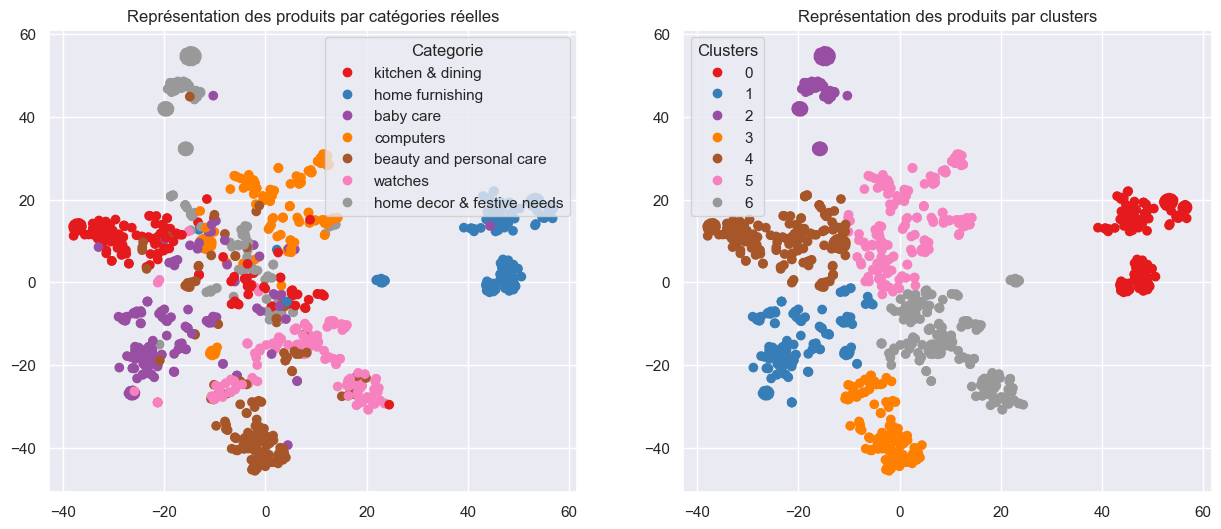

ARI :  0.479


In [113]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

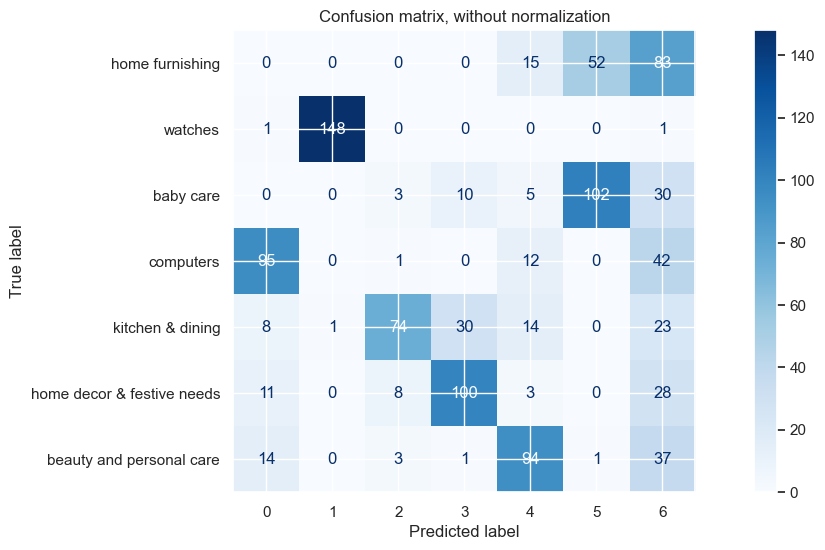

In [91]:
plot_confusion_matrix(y_cat_num, labels,class_labels=l_cat,normalize_f=None)

### <font color='green'> Model W2V pré-entrainé de google </font>

In [114]:
%%time
from gensim.models import KeyedVectors
modelpw2wgoogle = KeyedVectors.load_word2vec_format('data/support/Word2Vec/GoogleNews-vectors-negative300.bin', binary=True)

In [116]:
vectorized_docs = vectorize(df.description_clean, model=modelpw2wgoogle)

# utiliser un minibatch kmeans pas utils si donnée compte moins de 2000 echantillons
clusteringW2Vpre, W2Vprecluster_labels = mbkmeans_clusters(
    X=vectorized_docs,
    k=7,
    # mb=1024, # puissance de 2
    print_silhouette_values=True,
)
print('\n')
print('Score ARI sur Avant diminution de dimension')
_ = ARI_fct_raw(W2Vprecluster_labels,df.cat_1)

For n_clusters = 7
Silhouette coefficient: 0.18
Inertia:1192.37655658599
Silhouette values:
    Cluster 5: Size:17 | Avg:0.51 | Min:0.24 | Max: 0.62
    Cluster 1: Size:717 | Avg:0.20 | Min:-0.02 | Max: 0.32
    Cluster 2: Size:23 | Avg:0.19 | Min:-0.08 | Max: 0.44
    Cluster 6: Size:94 | Avg:0.18 | Min:-0.01 | Max: 0.37
    Cluster 0: Size:65 | Avg:0.10 | Min:-0.11 | Max: 0.37
    Cluster 3: Size:90 | Avg:0.03 | Min:-0.12 | Max: 0.24
    Cluster 4: Size:44 | Avg:-0.04 | Min:-0.20 | Max: 0.17


Score ARI sur Avant diminution de dimension
ARI :  0.0814


In [117]:
print( 'Score ARI après TSNE 2D + Clustering')
ARI, X_tsne, labels = ARI_fct(pd.DataFrame(vectorized_docs))

Score ARI après TSNE 2D + Clustering
ARI :  0.5081 time :  12.0


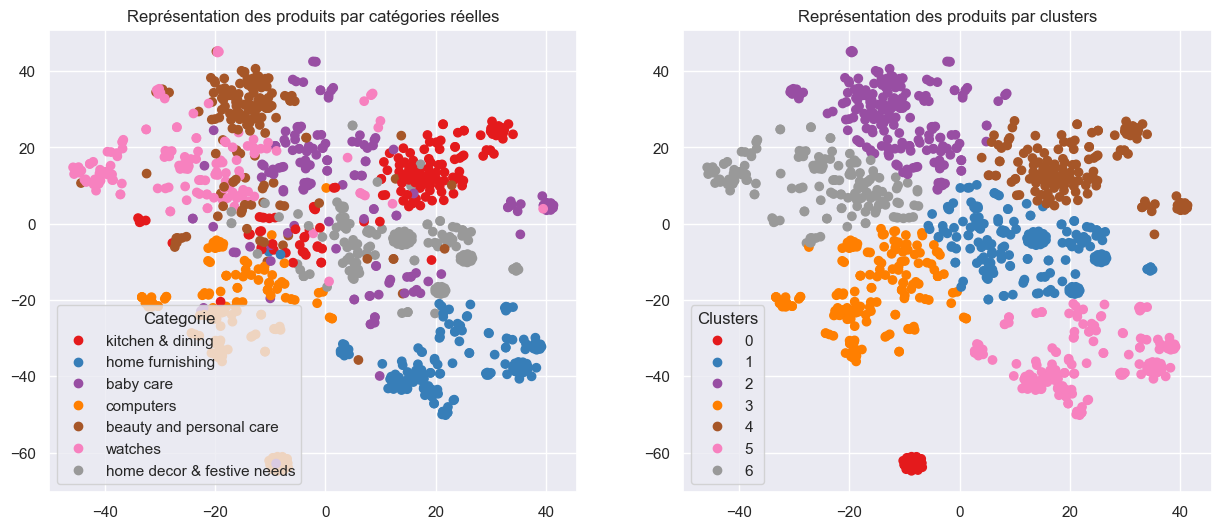

ARI :  0.5081


In [118]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [119]:
del modelpw2wgoogle

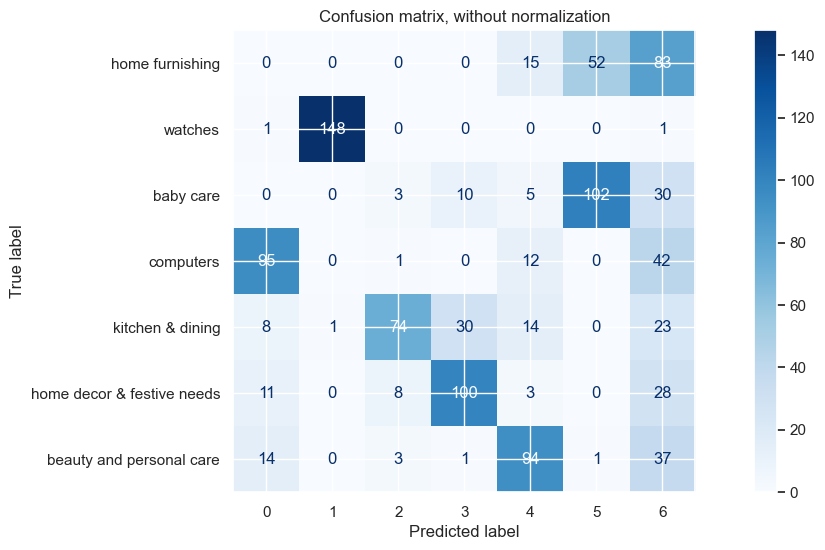

In [91]:
plot_confusion_matrix(y_cat_num, labels,class_labels=l_cat,normalize_f=None)

</Br>

### - <a name="C422"><font color='green'>4.2.b GloVe </font></a> 

In [125]:
print('Indexing word vectors.')

emmbed_dict = {}
f = open('data/support/glove.6B/glove.6B.200d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    emmbed_dict[word] = coefs
f.close()

print('Found %s word vectors.' % len(emmbed_dict))

Indexing word vectors.
Found 400001 word vectors.


In [106]:
from scipy import spatial
def find_similar_word(emmbedes):
    nearest = sorted(emmbed_dict.keys(), key=lambda word: spatial.distance.euclidean(emmbed_dict[word], emmbedes))
    return nearest

find_similar_word(emmbed_dict['river'])[0:10]

['river',
 'rivers',
 'creek',
 'lake',
 'danube',
 'valley',
 'basin',
 'flows',
 'canal',
 'estuary']

In [122]:
print(find_closest_embeddings(emmbed_dict["king"])[1:6])

['prince', 'queen', 'uncle', 'ii', 'grandson']


In [117]:
def find_closest_embeddings(embedding):
    return sorted(emmbed_dict.keys(), key=lambda word: spatial.distance.euclidean(emmbed_dict[word], embedding))

In [126]:
print(find_closest_embeddings(
    emmbed_dict["king"] - emmbed_dict["man"] + emmbed_dict["woman"]
)[:5])

['king', 'queen', 'monarch', 'princess', 'throne']


In [129]:
# conversion ds vecteurs GloVe au format texte au format texte word2vec :
from gensim.scripts.glove2word2vec import glove2word2vec
glove2word2vec(glove_input_file="data/support/glove.6B/glove.6B.300d.txt", 
               word2vec_output_file="data/support/glove.6B/gensim_glove_vectors.txt")

# Chargement du model glove
from gensim.models import KeyedVectors
glove_model = KeyedVectors.load_word2vec_format('data/support/glove.6B/gensim_glove_vectors.txt', binary=False)

C:\Users\eleor\AppData\Local\Temp\ipykernel_18600\718398660.py:3: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file="data/support/glove.6B/glove.6B.300d.txt",


In [131]:
vectorized_docs = vectorize(df.description_clean, model=glove_model)

# utiliser un minibatch kmeans pas utils si donnée compte moins de 2000 echantillons
clusteringGlove, Glovecluster_labels = mbkmeans_clusters(
    X=vectorized_docs,
    k=7,
    # mb=1024, # puissance de 2
    print_silhouette_values=True,
)
print('\n')
print('Score ARI sur Avant diminution de dimension')
_ = ARI_fct_raw(Glovecluster_labels,df.cat_1)

For n_clusters = 7
Silhouette coefficient: 0.21
Inertia:5999.116527267452
Silhouette values:
    Cluster 0: Size:17 | Avg:0.51 | Min:0.27 | Max: 0.62
    Cluster 6: Size:739 | Avg:0.25 | Min:0.02 | Max: 0.39
    Cluster 5: Size:78 | Avg:0.21 | Min:0.00 | Max: 0.40
    Cluster 2: Size:56 | Avg:0.19 | Min:-0.04 | Max: 0.45
    Cluster 1: Size:65 | Avg:0.01 | Min:-0.16 | Max: 0.27
    Cluster 4: Size:36 | Avg:-0.00 | Min:-0.17 | Max: 0.18
    Cluster 3: Size:59 | Avg:-0.01 | Min:-0.25 | Max: 0.18


Score ARI sur Avant diminution de dimension
ARI :  0.0667


In [132]:
print( 'Score ARI après TSNE 2D + Clustering')
ARI, X_tsne, labels = ARI_fct(pd.DataFrame(vectorized_docs))

Score ARI après TSNE 2D + Clustering
ARI :  0.4447 time :  11.0


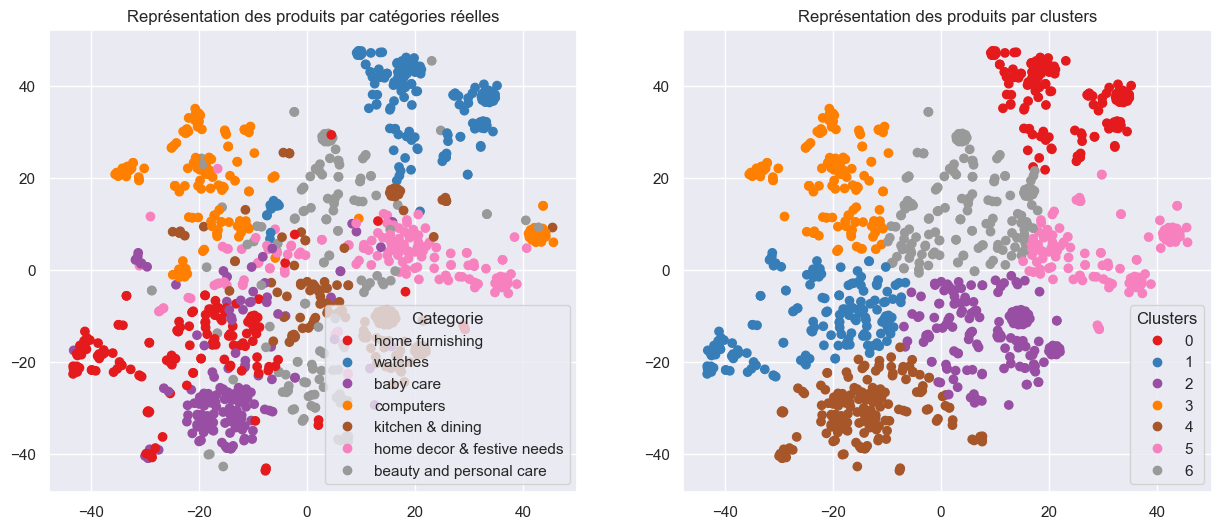

ARI :  0.4447


In [133]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

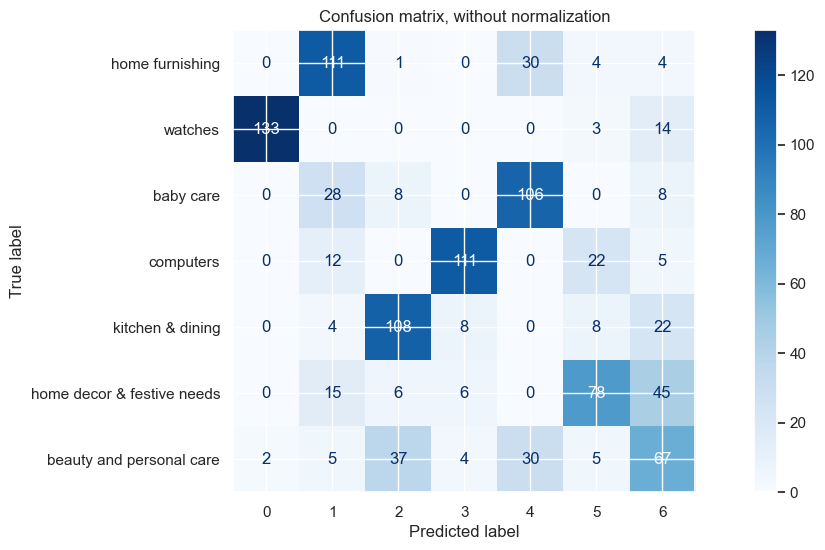

In [134]:
plot_confusion_matrix(y_cat_num, labels,class_labels=l_cat,normalize_f=None)

</Br>

### - <a name="C423"><font color='green'>4.2.c FastText </font></a> 

#####  <font color='green'>4.2.c.1 FastText prélearning model </font>

In [120]:
import gensim
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Load pre-trained FastText model
model_path = 'cc.en.100.bin'
model = gensim.models.fasttext.load_facebook_vectors(model_path)

In [121]:
# Define Document Vectors list from Word Embedding
vectorized_docs = vectorize(df.description_clean, model=model)
len(vectorized_docs), len(vectorized_docs[0])

(1050, 100)

In [122]:
vectorized_docs = vectorize(df.description_clean, model=model)

# utiliser un minibatch kmeans pas utils si donnée compte moins de 2000 echantillons
clusteringFastText, FastTextcluster_labels = mbkmeans_clusters(
    X=vectorized_docs,
    k=7,
    # mb=1024, # puissance de 2
    print_silhouette_values=True,
)
print('\n')
print('Score ARI sur Avant diminution de dimension')
_ = ARI_fct_raw(FastTextcluster_labels,df.cat_1)

For n_clusters = 7
Silhouette coefficient: 0.10
Inertia:95.5708980234887
Silhouette values:
    Cluster 3: Size:38 | Avg:0.48 | Min:0.03 | Max: 0.69
    Cluster 1: Size:29 | Avg:0.30 | Min:-0.03 | Max: 0.59
    Cluster 4: Size:493 | Avg:0.15 | Min:-0.02 | Max: 0.28
    Cluster 6: Size:266 | Avg:0.04 | Min:-0.07 | Max: 0.17
    Cluster 5: Size:60 | Avg:0.03 | Min:-0.20 | Max: 0.20
    Cluster 2: Size:54 | Avg:0.00 | Min:-0.18 | Max: 0.16
    Cluster 0: Size:110 | Avg:-0.12 | Min:-0.28 | Max: 0.05


Score ARI sur Avant diminution de dimension
ARI :  0.1097


In [123]:
print( 'Score ARI après TSNE 2D + Clustering')
ARI, X_tsne, labels = ARI_fct(pd.DataFrame(vectorized_docs))

Score ARI après TSNE 2D + Clustering
ARI :  0.341 time :  12.0


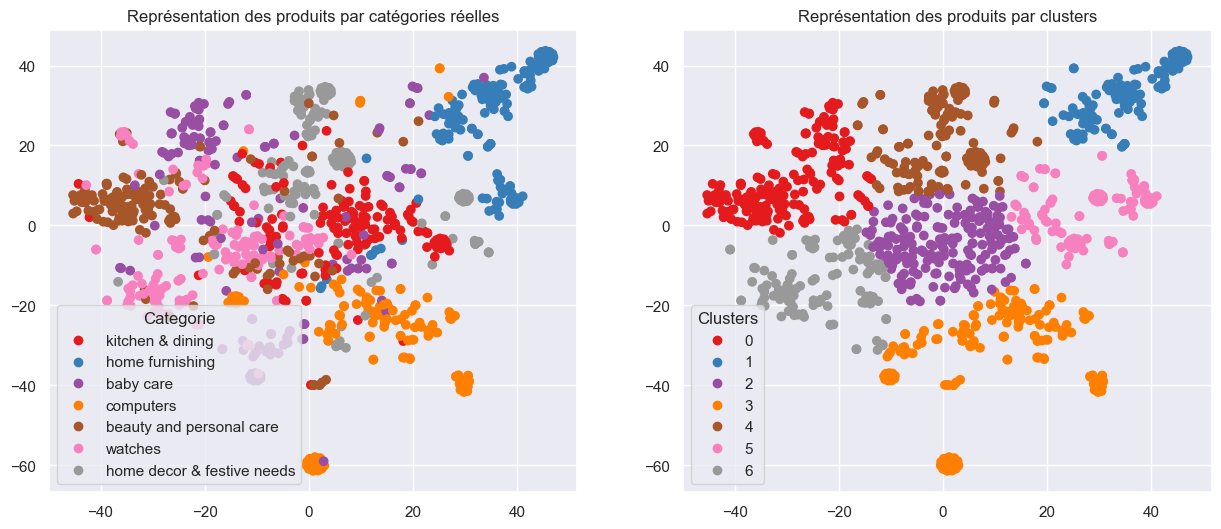

ARI :  0.341


In [124]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [ ]:
del model

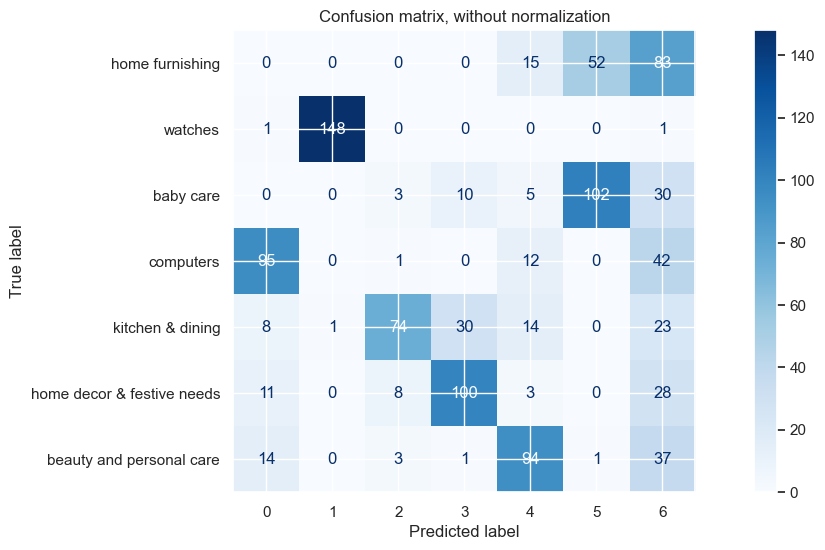

In [91]:
plot_confusion_matrix(y_cat_num, labels,class_labels=l_cat,normalize_f=None)

#####  <font color='green'>4.2.c.2 FastText local train model </font>

In [33]:
help(FastText.train)

Help on function train in module gensim.models.word2vec:

train(self, corpus_iterable=None, corpus_file=None, total_examples=None, total_words=None, epochs=None, start_alpha=None, end_alpha=None, word_count=0, queue_factor=2, report_delay=1.0, compute_loss=False, callbacks=(), **kwargs)
    Update the model's neural weights from a sequence of sentences.
    
    Notes
    -----
    To support linear learning-rate decay from (initial) `alpha` to `min_alpha`, and accurate
    progress-percentage logging, either `total_examples` (count of sentences) or `total_words` (count of
    raw words in sentences) **MUST** be provided. If `sentences` is the same corpus
    that was provided to :meth:`~gensim.models.word2vec.Word2Vec.build_vocab` earlier,
    you can simply use `total_examples=self.corpus_count`.
    
    Warnings
    --------
    To avoid common mistakes around the model's ability to do multiple training passes itself, an
    explicit `epochs` argument **MUST** be provided. In the c

In [126]:
len(df.description_clean)

1050

In [133]:
from gensim.models.fasttext import FastText
model = FastText(vector_size=100, window=3)
model.build_vocab(corpus_iterable=df.description_clean)  # scan over corpus to build the vocabulary

total_words = model.corpus_total_words  # number of words in the corpus
model.train(corpus_iterable=df.description_clean, total_words=total_words, epochs=25)

(654589, 852300)

In [135]:
vectorized_docs = vectorize(df.description_clean, model=model.wv)

# utiliser un minibatch kmeans pas utils si donnée compte moins de 2000 echantillons
clusteringFastText, FastTextcluster_labels = mbkmeans_clusters(
    X=vectorized_docs,
    k=7,
    # mb=1024, # puissance de 2
    print_silhouette_values=True,
)
print('\n')
print('Score ARI sur Avant diminution de dimension')
_ = ARI_fct_raw(FastTextcluster_labels,df.cat_1)

For n_clusters = 7
Silhouette coefficient: 0.26
Inertia:4373.414882682126
Silhouette values:
    Cluster 1: Size:134 | Avg:0.53 | Min:0.09 | Max: 0.64
    Cluster 3: Size:75 | Avg:0.34 | Min:0.00 | Max: 0.46
    Cluster 5: Size:85 | Avg:0.33 | Min:0.04 | Max: 0.52
    Cluster 6: Size:131 | Avg:0.25 | Min:-0.05 | Max: 0.43
    Cluster 2: Size:363 | Avg:0.19 | Min:-0.04 | Max: 0.37
    Cluster 4: Size:183 | Avg:0.18 | Min:-0.02 | Max: 0.35
    Cluster 0: Size:79 | Avg:0.17 | Min:-0.08 | Max: 0.32


Score ARI sur Avant diminution de dimension
ARI :  0.3165


In [136]:
print( 'Score ARI après TSNE 2D + Clustering')
ARI, X_tsne, labels = ARI_fct(pd.DataFrame(vectorized_docs))

Score ARI après TSNE 2D + Clustering
ARI :  0.4276 time :  11.0


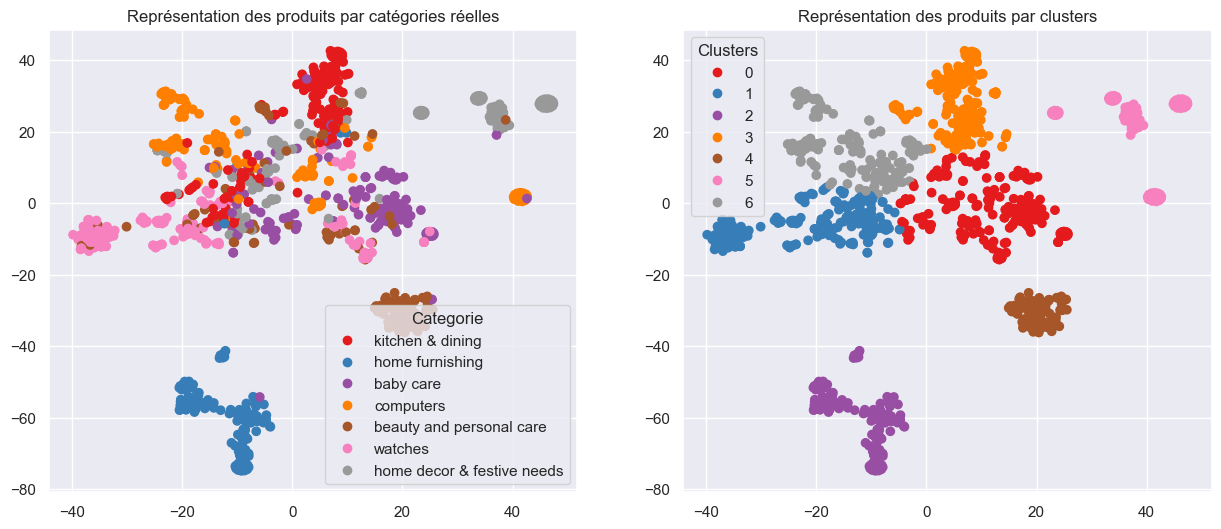

ARI :  0.4276


In [137]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

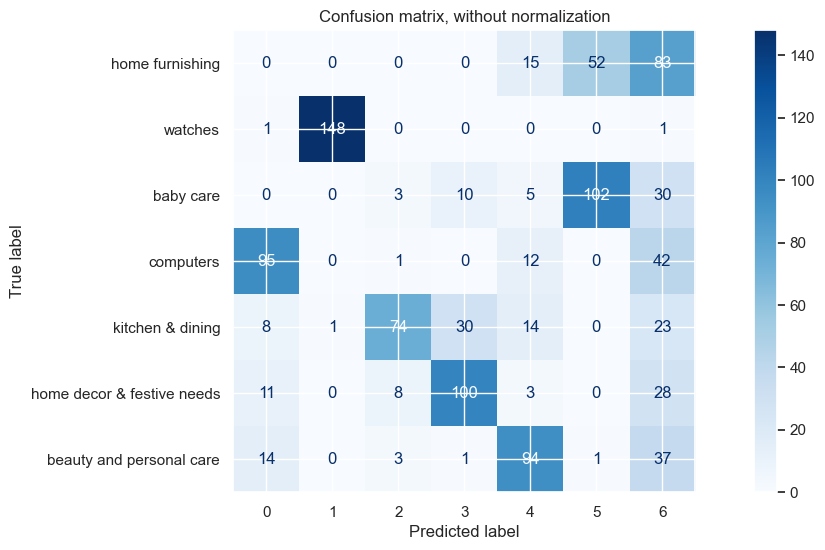

In [91]:
plot_confusion_matrix(y_cat_num, labels,class_labels=l_cat,normalize_f=None)

</Br>

### <a name="C424"><font color='green'>4.2.d Modélisez des sujets avec des méthodes non supervisées </font></a> 

#### <font color='green'> Latent Dirichlet Allocation (LDA) </font>

In [138]:
from sklearn.decomposition import LatentDirichletAllocation
n_topics = 100

# Créer le modèle LDA
lda = LatentDirichletAllocation(
        n_components=n_topics, 
        max_iter=5, 
        learning_method='online', 
        learning_offset=50.,
        random_state=0)

# Fitter sur les données
lda.fit(CountWord)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=100, random_state=0)

Score ARI après TSNE 2D + Clustering
ARI :  0.3729 time :  10.0


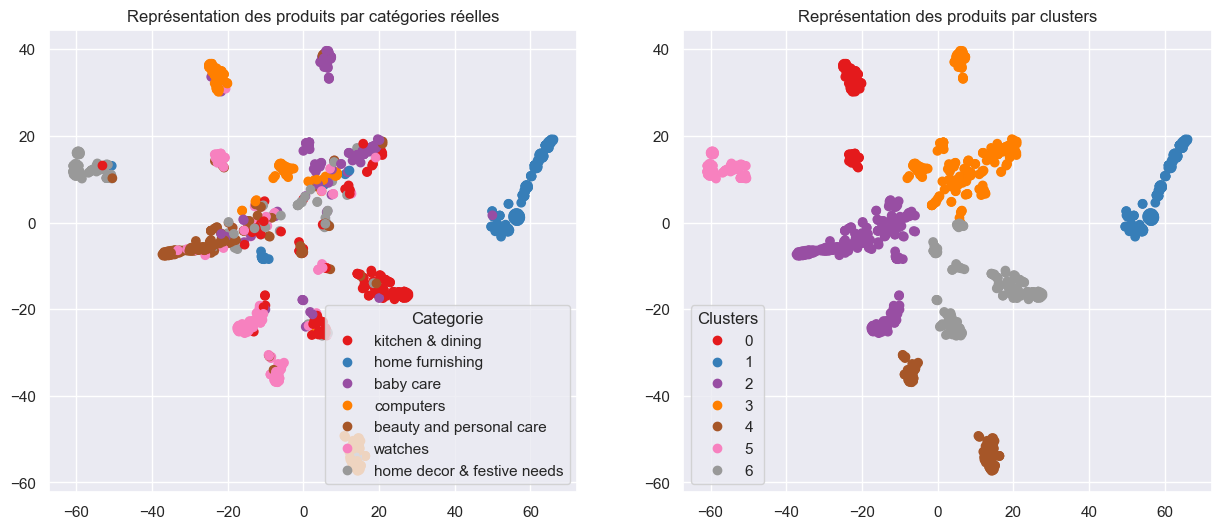

ARI :  0.3729


In [149]:
print( 'Score ARI après TSNE 2D + Clustering')
ARI, X_tsne, labels = ARI_fct(pd.DataFrame(lda.transform(CountWord)))
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

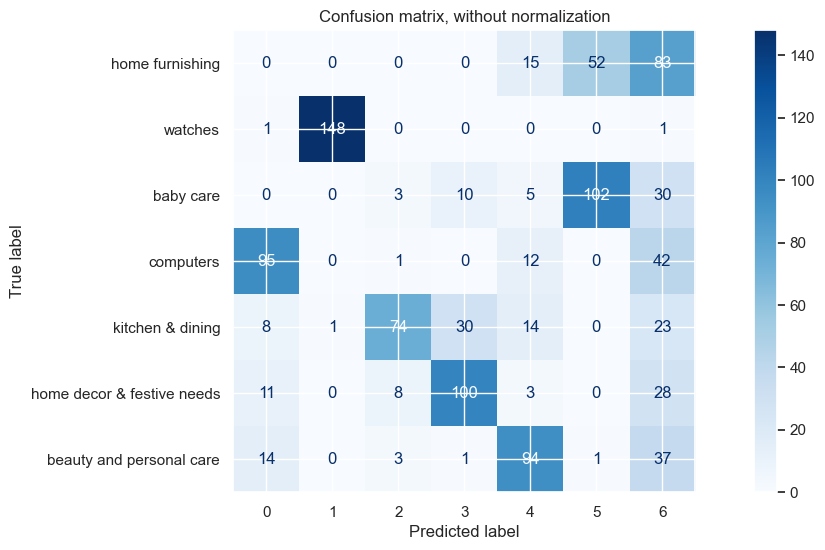

In [91]:
plot_confusion_matrix(y_cat_num, labels,class_labels=l_cat,normalize_f=None)

#### <font color='green'> NMF (Negative Matrix Factorisation) </font>

In [147]:
from sklearn.decomposition import NMF

# NMF is able to use tf-idf
no_topics = 100

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1,  l1_ratio=.5, init='nndsvd')
nmf.fit(tfidf_values)

no_top_words = 10
display_topics(nmf, TFIDF_df.columns, no_top_words)

Topic 0:
man analog watch discount india great hmt flippd round resistant
Topic 1:
boy watch sport time india discount great ethnic elegance pant
Topic 2:
mug ceramic akup safe diameter capacity coffee freezer yes birthday
Topic 3:
showpiece good statue india handcraft house port aapno sit couple
Topic 4:
set combo archie engage yardley deo nike envy denim gift
Topic 5:
laptop skin mouse pad shape print warranty multicolor inch easy
Topic 6:
towel bath cotton set hand soft terry face absorbent marvel
Topic 7:
cell battery laptop pavilion lapguard rega compatible series lenovo old
Topic 8:
rockmantra mug ceramic permanent thrilling porcelain stay start creation dishwasher
Topic 9:
lead light usb lamp portable flexible good fashion universal read
Topic 10:
zyxel card port wireless sound usb class board video requirement
Topic 11:
kadhai good hole cookware stick non premium shop metallino task
Topic 12:
maxima resistant strap dial water clasp case buckle round attivo
Topic 13:
eyelet curt

Score ARI après TSNE 2D + Clustering


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but NMF was fitted without feature names
  warnings.warn(


ARI :  0.2426 time :  11.0


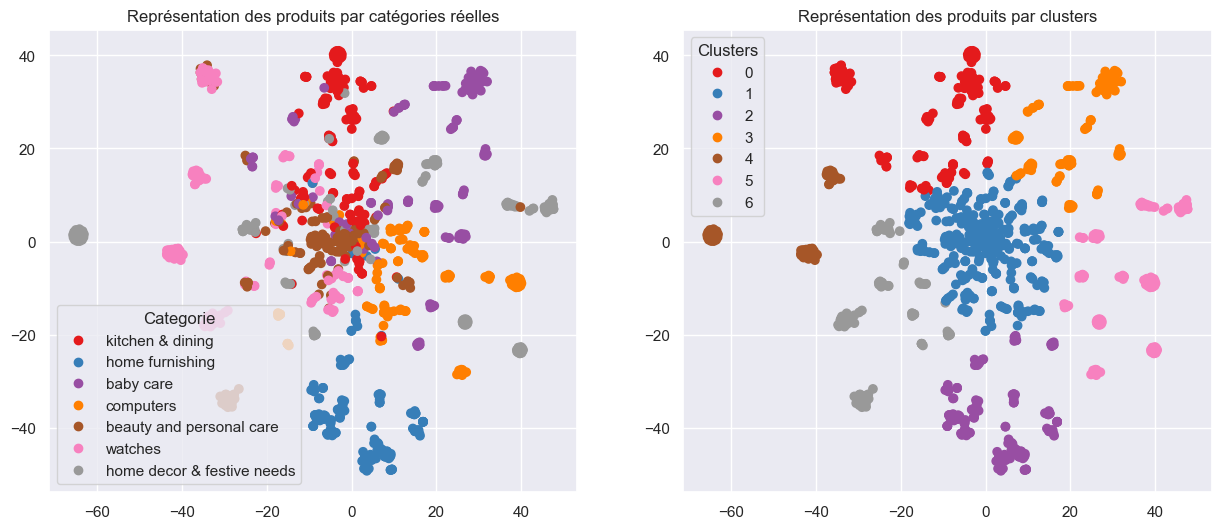

ARI :  0.2426


In [150]:
print( 'Score ARI après TSNE 2D + Clustering')
ARI, X_tsne, labels = ARI_fct(pd.DataFrame(nmf.transform(TFIDF_df)))
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

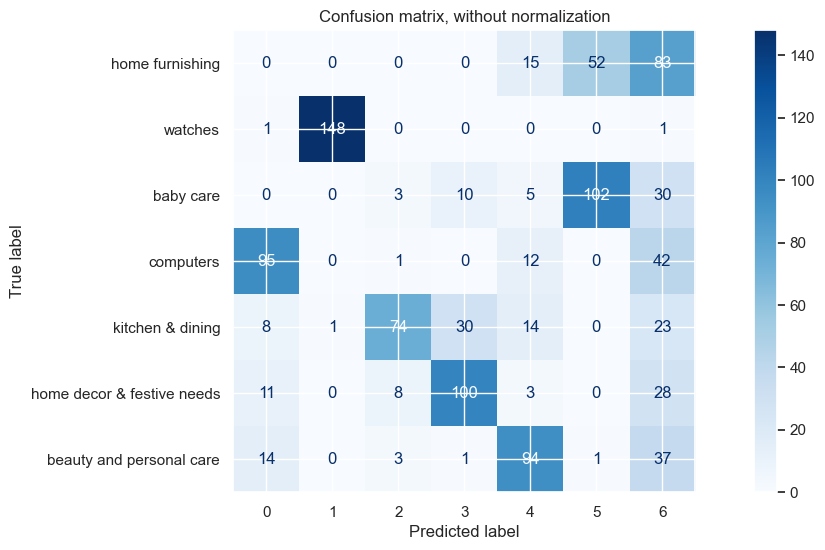

In [91]:
plot_confusion_matrix(y_cat_num, labels,class_labels=l_cat,normalize_f=None)

### <a name="C43"><font color='green'>4.3 Effectuez des plongements de mots (word embeddings) </font></a> 

### Fonctions communes

In [25]:
def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words
from nltk.corpus import stopwords
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text


df['sentence_bow_lem'] = df['description'].apply(lambda x : transform_bow_lem_fct(x))
df['sentence_dl'] = df['description'].apply(lambda x : transform_dl_fct(x))

</Br>

</Br>

</Br>

#### <a name="C431"><font color='green'>4.3.a BERT </font></a> 

In [141]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers
#from transformers import *

os.environ["TF_KERAS"]='1'

In [142]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.11.0
2.11.0
Num GPUs Available:  0
False


### Fonctions communes

In [167]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = transformers.AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

</Br>

## BERT HuggingFace

### 'bert-base-uncased'

In [163]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = transformers.TFAutoModel.from_pretrained(model_type)
sentences = df['sentence_dl'].to_list()

loading configuration file config.json from cache at C:\Users\eleor/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.24.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

loading weights file tf_model.h5 from cache at C:\Users\eleor/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\tf_model.h5
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further

In [168]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

loading configuration file config.json from cache at C:\Users\eleor/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.24.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

loading file vocab.txt from cache at C:\Users\eleor/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\vocab.txt
loading file tokenizer.json from cache at C:\Users\eleor/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\tokenizer.json
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at C:\Users\eleor/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\tokenizer_config.json
loading configuration file config.json from cache at C:\Users\eleor/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient

1/1 [==============================] - 1s 795ms/step
temps traitement :  108.0


In [169]:
ARI, X_tsne, labels = ARI_fct(features_bert)

ARI :  0.3281 time :  7.0


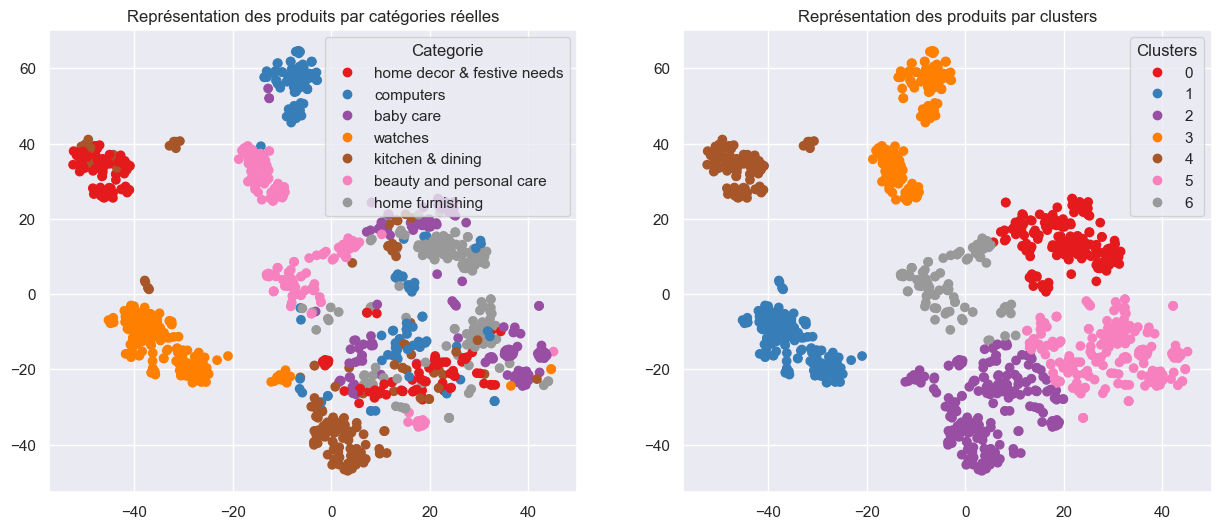

ARI :  0.3281


In [170]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

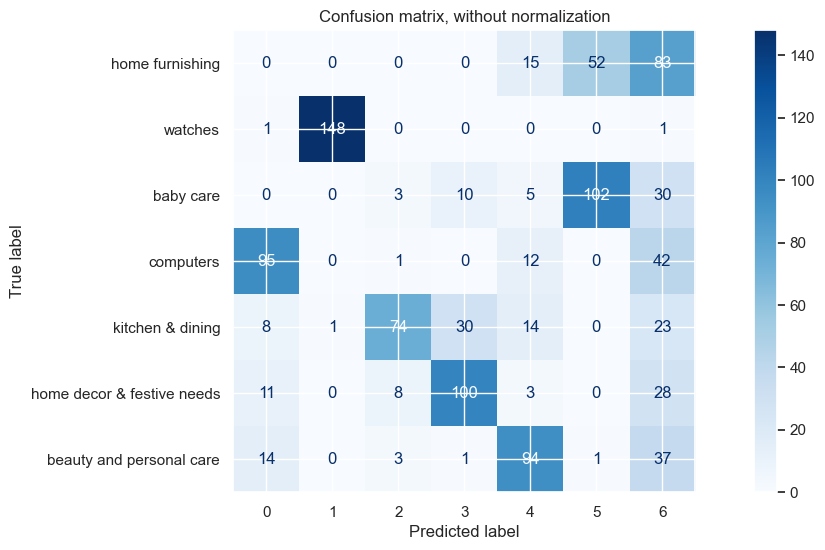

In [91]:
plot_confusion_matrix(y_cat_num, labels,class_labels=l_cat,normalize_f=None)

### 'cardiffnlp/twitter-roberta-base-sentiment'
* Modèle pré-entraîné sur des tweets pour l'analyse de sentiment = particulièrement adapté au contexte

In [171]:
max_length = 64
batch_size = 10
model_type = 'cardiffnlp/twitter-roberta-base-sentiment'
model = transformers.TFAutoModel.from_pretrained(model_type)
sentences = df['sentence_dl'].to_list()

loading configuration file config.json from cache at C:\Users\eleor/.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment\snapshots\daefdd1f6ae931839bce4d0f3db0a1a4265cd50f\config.json
Model config RobertaConfig {
  "_name_or_path": "cardiffnlp/twitter-roberta-base-sentiment",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

loading weights file tf_model.h5 from cache at C:\Users\eleor/.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment\snapshots\daefdd1f6ae931839bce4d0f3db0a1a4265cd50f\tf_model.h5
Some layers from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment were not used when initializing TFRobertaModel: ['classifier']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was tr

In [172]:
features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

Could not locate the tokenizer configuration file, will try to use the model config instead.
loading configuration file config.json from cache at C:\Users\eleor/.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment\snapshots\daefdd1f6ae931839bce4d0f3db0a1a4265cd50f\config.json
Model config RobertaConfig {
  "_name_or_path": "cardiffnlp/twitter-roberta-base-sentiment",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

loading file vocab.json from cache at C:\Users\eleor/.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment\snapshots\daefdd1f6ae931839bce4d0f3db0a1a4265cd50f\vocab.json
loading file merges.txt from cache at C:\Users\eleor/.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment\snapshots\daefdd1f6ae931839bce4d0f3db0a1a4265cd50f\merges.txt
loading file tokenizer.json from cache at None
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at C:\Users\eleor/.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment\snapshots\daefdd1f6ae931839bce4d0f3db0a1a4265cd50f\special_tokens_map.json
loading file tokenizer_config.json from cache at None
loading configuration file config.json from cache at C:\Users\eleor/.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment\snapshots\daefdd1f6ae931839bce4d0f3db0a1a4265cd50f\config.json
Model config RobertaConfig {
  "_name_or_path": "ca

1/1 [==============================] - 1s 741ms/step
temps traitement :  96.0


In [173]:
ARI, X_tsne, labels = ARI_fct(features_bert)

ARI :  0.2285 time :  7.0


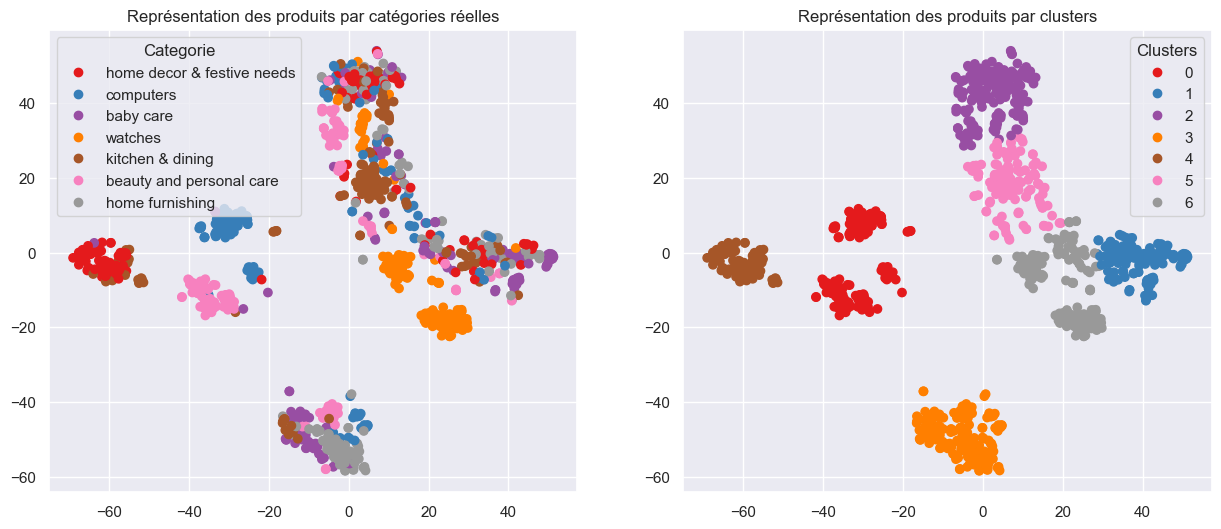

ARI :  0.2285


In [174]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

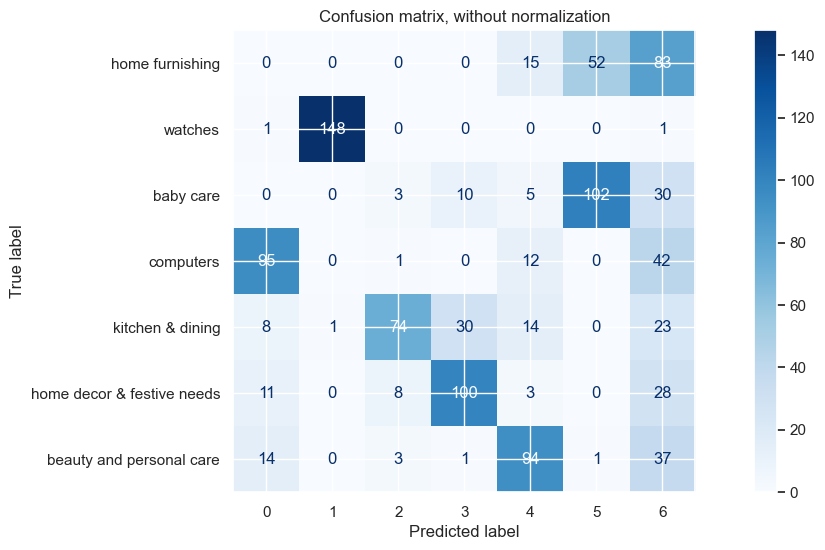

In [91]:
plot_confusion_matrix(y_cat_num, labels,class_labels=l_cat,normalize_f=None)

</Br>

#### <a name="C432"><font color='green'>4.3.b USE - Universal Sentence Encoder </font></a> 

In [149]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import transformers
#from transformers import *

os.environ["TF_KERAS"]='1'

In [150]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.11.0
2.11.0
Num GPUs Available:  0
False


In [159]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [152]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [156]:
df.head()

,uniq_id,description,cat_1,cat_2,cat_3,sentence_bow_lem,sentence_dl
0,55b85ea15a1536d46b7190ad6fff8ce7,Key Features of Elegance Polyester Multicolor ...,home furnishing,curtains & accessories,curtains,key feature elegance polyester multicolor abst...,key features of elegance polyester multicolor ...
1,7b72c92c2f6c40268628ec5f14c6d590,Specifications of Sathiyas Cotton Bath Towel (...,baby care,baby bath & skin,baby bath towels,specification sathiyas cotton bath towel bath ...,specifications of sathiyas cotton bath towel (...
2,64d5d4a258243731dc7bbb1eef49ad74,Key Features of Eurospa Cotton Terry Face Towe...,baby care,baby bath & skin,baby bath towels,key feature eurospa cotton terry face towel se...,key features of eurospa cotton terry face towe...
3,d4684dcdc759dd9cdf41504698d737d8,Key Features of SANTOSH ROYAL FASHION Cotton P...,home furnishing,bed linen,bedsheets,key feature santosh royal fashion cotton print...,key features of santosh royal fashion cotton p...
4,6325b6870c54cd47be6ebfbffa620ec7,Key Features of Jaipur Print Cotton Floral Kin...,home furnishing,bed linen,bedsheets,key feature jaipur print cotton floral king si...,key features of jaipur print cotton floral kin...


In [157]:
batch_size = 10
sentences = df['sentence_dl'].to_list()

In [160]:
features_USE = feature_USE_fct(sentences, batch_size)

In [161]:
ARI, X_tsne, labels = ARI_fct(features_USE)

ARI :  0.4318 time :  6.0


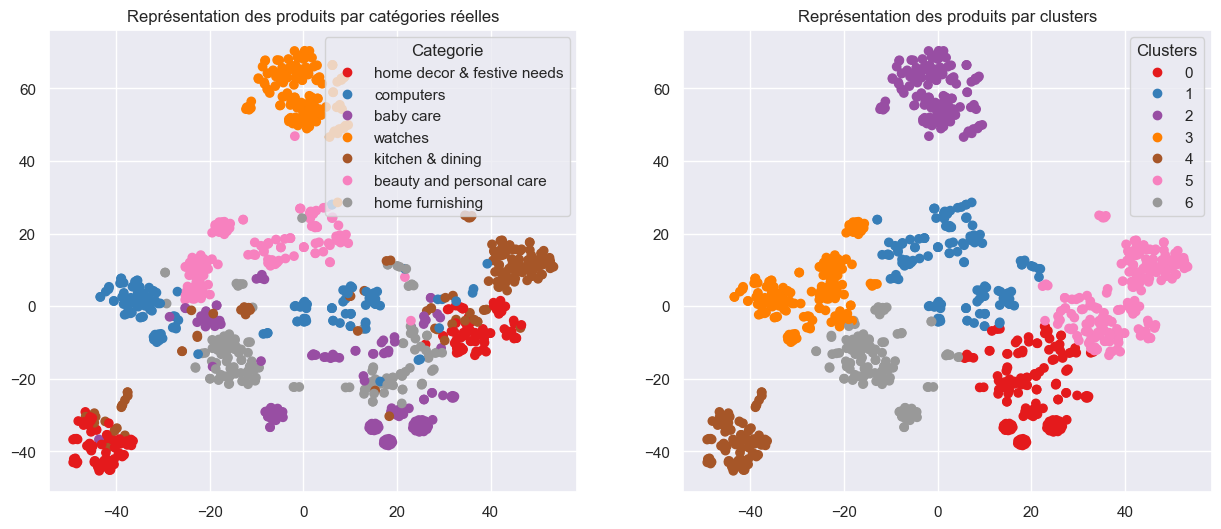

ARI :  0.4318


In [162]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

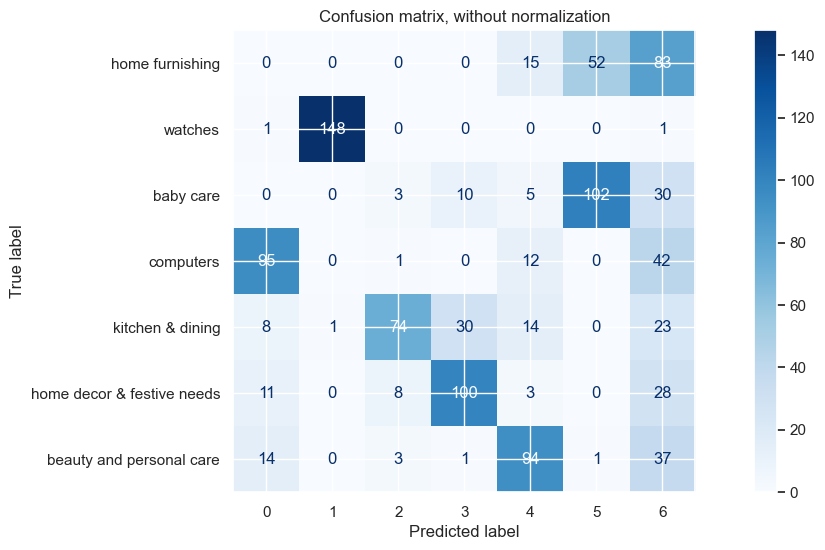

In [91]:
plot_confusion_matrix(y_cat_num, labels,class_labels=l_cat,normalize_f=None)

</Br>

# <a name="C5"><font color='pink'>**Partie 5 : Conclusion**</font></a> 

</br>

</br>

</br>